In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
base_dir = 'flowers3/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
print(len(os.listdir(train_dir+'/daisy')) + len(os.listdir(test_dir+'/daisy')) + len(os.listdir(validation_dir+'/daisy')))
print(len(os.listdir(train_dir+'/dandelion')) + len(os.listdir(test_dir+'/dandelion')) + len(os.listdir(validation_dir+'/dandelion')))
print(len(os.listdir(train_dir+'/rose')) + len(os.listdir(test_dir+'/rose')) + len(os.listdir(validation_dir+'/rose')))
print(len(os.listdir(train_dir+'/sunflower')) + len(os.listdir(test_dir+'/sunflower')) + len(os.listdir(validation_dir+'/sunflower')))
print(len(os.listdir(train_dir+'/tulip')) + len(os.listdir(test_dir+'/tulip')) + len(os.listdir(validation_dir+'/tulip')))

769
1052
784
734
984


In [4]:
img_h = 224
img_w = 224
img_col = 3

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set = train_datagen.flow_from_directory(train_dir, target_size=(img_h, img_w),batch_size=32, class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_set = val_datagen.flow_from_directory(validation_dir,target_size=(img_h, img_w), batch_size=32, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,target_size=(img_h, img_w), batch_size=32, class_mode='categorical')

Found 3025 images belonging to 5 classes.
Found 649 images belonging to 5 classes.
Found 649 images belonging to 5 classes.


In [7]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=[img_h, img_w, img_col]))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
cnn.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
cnn.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

In [10]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = cnn.fit(x=training_set, validation_data=val_set, epochs=50)

Epoch 1/10
95/95 [==============================] - 54s 550ms/step - loss: 1.4003 - accuracy: 0.4060 - val_loss: 1.1420 - val_accuracy: 0.5300
Epoch 2/10
95/95 [==============================] - 25s 267ms/step - loss: 1.0893 - accuracy: 0.5547 - val_loss: 0.9450 - val_accuracy: 0.6456
Epoch 3/10
95/95 [==============================] - 25s 266ms/step - loss: 0.9497 - accuracy: 0.6251 - val_loss: 0.9328 - val_accuracy: 0.6672
Epoch 4/10
95/95 [==============================] - 25s 264ms/step - loss: 0.8954 - accuracy: 0.6565 - val_loss: 0.9095 - val_accuracy: 0.6749
Epoch 5/10
95/95 [==============================] - 25s 265ms/step - loss: 0.8382 - accuracy: 0.6731 - val_loss: 0.9107 - val_accuracy: 0.7026
Epoch 6/10
95/95 [==============================] - 25s 264ms/step - loss: 0.7698 - accuracy: 0.6979 - val_loss: 0.8341 - val_accuracy: 0.6934
Epoch 7/10
95/95 [==============================] - 25s 265ms/step - loss: 0.6877 - accuracy: 0.7458 - val_loss: 0.8109 - val_accuracy: 0.6980

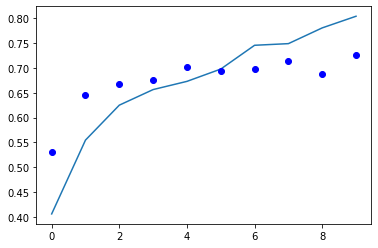

In [12]:
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], 'bo', label='Validation acc')

In [13]:
test_loss, test_acc = cnn.evaluate(test_set)

21/21 [==============================] - 3s 134ms/step - loss: 0.8569 - accuracy: 0.6810
